## Final Project Submission

Please fill out:
* Student name: Rafael Villanueva
* Student pace: part time  
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL:


Begin by explaining the project outline and the projects obejectives. What questions are you trying to answer with the data set? what is the data set and where did you get it? 

This project has multiple data sets that contain data about movies from Box Office Mojo, IMDB, Rotten Tomatoes, and TheMovieDB.org.

The basis of this project is to attempt to gain a better understanding of the movie industry in order to increase the chances of success of a new movie studio that focuses on original content. This will be accomplished using various Python libraries and basic summary statistics to highlight key drivers of movie success.  

What are the key drivers of ROI?

What are the key drivers of popularity? (stars etc.)
    timing of release (season) ?
    can we break these into percentiles? i.e. does 75th percentile define success?
    rating
    genre 
    lead character M/F?
    release year
    duration
Visualizations
    Distribution of ratings,release time (season or year) , budget
    bar plot - rating
    
    
    

In [74]:
#import pandas library under the alias pd
#import visualization libraries matplotlib and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 
from functools import reduce

In [14]:
#load movie data from the imdb data set into pandas dataframes
name_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\name_basics.csv")
title_akas = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_akas.csv")
title_basics = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_basics.csv")
title_crew = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_crew.csv")
title_ratings = pd.read_csv(r"C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\title_ratings.csv")


In [57]:
#list of column names, some of these might need to be re-labeled.
# Each table of the IMDb data set has a unique movie identifier that is common in each data set
# but they have different names, re name al id columns to title_id

#list(name_basics.columns.values)
#list(title_akas.columns.values)
#list(title_basics.columns.values)
#list(title_crew.columns.values)
#list(title_ratings.columns.values)
#list(title_principles.columns.values)

['tconst', 'ordering', 'nconst', 'category', 'job', 'characters']

renaming columns in imdb datasets to make title_id consistent between the data sets to prepare for merge

In [67]:
#name_basics.rename(columns = {'nconst' : 'title_id'}, inplace = True)
#title_basics.rename(columns = {'tconst' : 'title_id'}, inplace = True)
#title_crew.rename(columns = {'tconst' : 'title_id'}, inplace = True)
#title_ratings.rename(columns = {'tconst' : 'title_id'}, inplace = True)
#title_principles.rename(columns = {'tconst' : 'title_id'}, inplace = True)

now we have a column that is common to each data set, it might be easier to look at all of the imdb data in one table. For this we will you pandas merge method. We will also use the title_id column as the index using set_index. 

In [72]:
#title_basics.set_index('title_id', inplace=True)
#name_basics.set_index('title_id', inplace=True)
#title_crew.set_index('title_id', inplace=True)
#title_ratings.set_index('title_id', inplace=True)
#title_principles.set_index('title_id', inplace=True)

perform merge below.  The reduce function is used to apply a particular function passed in its argument to all of the list elements mentioned in the sequence passed along. empty are filled with void

In [81]:
# create a list of data sets
IMDb_data = [title_basics, name_basics, title_crew, title_ratings, title_principles]

#IMDb_merged = reduce(lambda  left,right: pd.merge(left,right,on=['title_id'],
                                            how='outer'), IMDb_data).fillna('null')

In [82]:
#IMDb_merged.to_csv(r'C:\Users\rafav\Documents\Flatiron\Final Project_Section 1\project_data\imdbdata.csv', encoding='utf-8')

In [83]:
list(IMDb_merged.columns.values)

['primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'genres',
 'primary_name',
 'birth_year',
 'death_year',
 'primary_profession',
 'known_for_titles',
 'directors',
 'writers',
 'averagerating',
 'numvotes',
 'ordering',
 'nconst',
 'category',
 'job',
 'characters']

In [89]:
IMDb_merged_inner.head()

,primary_title,original_title,start_year,runtime_minutes,genres,primary_name,birth_year,death_year,primary_profession,known_for_titles,directors,writers,averagerating,numvotes,ordering,nconst,category,job,characters
title_id,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",null,null,null,null,null,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7,77,10,nm0006210,composer,null,null
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",null,null,null,null,null,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7,77,1,nm0474801,actor,null,"[""Kundan S. Prasad"",""Bajrangi""]"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",null,null,null,null,null,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7,77,2,nm0904537,actress,null,"[""Munni"",""Laila-E-Aasmaan""]"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",null,null,null,null,null,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7,77,3,nm0756379,actor,null,"[""Ganeshi N. Prasad""]"
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",null,null,null,null,null,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",7,77,4,nm0474876,actor,null,"[""Dwarka N. Prasad""]"


In [92]:
IMDb_merged.dtypes

primary_title         object
original_title        object
start_year            object
runtime_minutes       object
genres                object
primary_name          object
birth_year            object
death_year            object
primary_profession    object
known_for_titles      object
directors             object
writers               object
averagerating         object
numvotes              object
ordering              object
nconst                object
category              object
job                   object
characters            object
dtype: object

In [93]:
IMDb_merged['runtime_minutes'].astype(str).astype(int)

ValueError: invalid literal for int() with base 10: '175.0'

explore the reviews using .describe() which shows basic summary statistics. 
We can also do this visually using boxplots which label the median, 25,50, and 75th percentiles. the whiskers show the range and dots are the outliers. 

In [40]:
#get an idea of the range in values for the ratings
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [ ]:
The Freedman-Diaconis rule is very robust and works well in practice. The bin-width is set to h=2×IQR×n−1/3. So the number of bins is (max−min)/h, 
where n is the number of observations, max is the maximum value and min is the minimum value.

In [ ]:
val = np.percentile (, [12, 32, 56, 81])

(array([  360.,   967.,  2616.,  5030.,  9347., 15735., 19460., 13093.,
         6248.,  1000.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

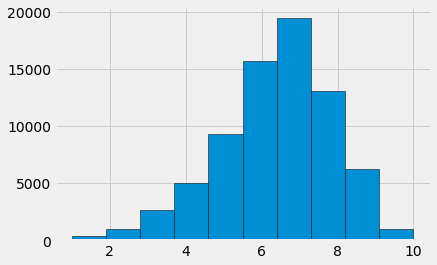

In [41]:
plt.style.use('fivethirtyeight')
plt.hist(title_ratings['averagerating'], edgecolor = 'black', label = 'Average Rating')

KeyError: "None of [Index(['runtime_minutes'], dtype='object')] are in the [columns]"

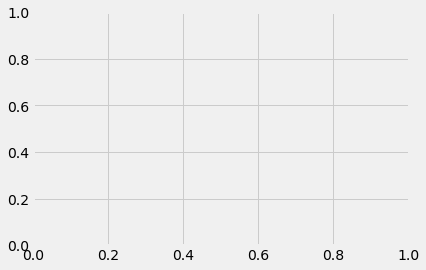

In [90]:
IMDb_merged.boxplot(column = ['runtime_minutes'])

Layout what sort of cleaning needs to be done 